In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm.auto import tqdm, trange

tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15

# Data Exploration

In [4]:
data = pd.read_csv('titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(data.shape)
data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64


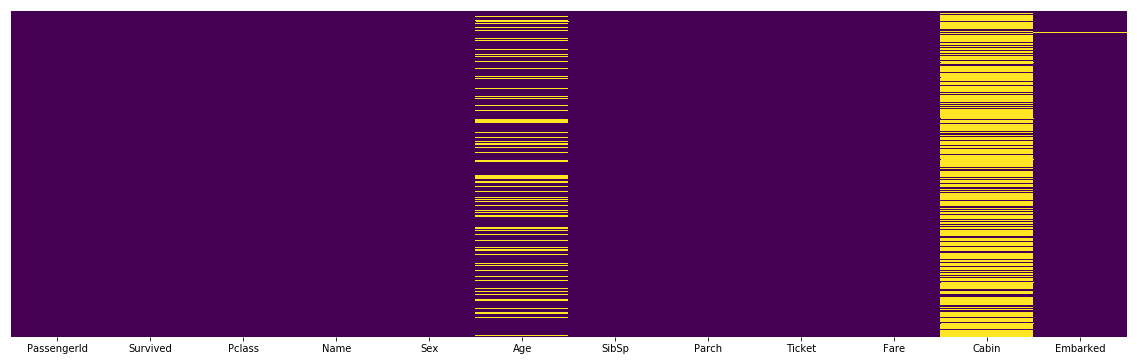

In [8]:
print(data.isnull().sum())
fig = plt.figure(figsize=(20,6))
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [9]:
data['Age'].fillna(data['Age'].median(), inplace=True)

# Feature Analysis

**Target Class Distribution**

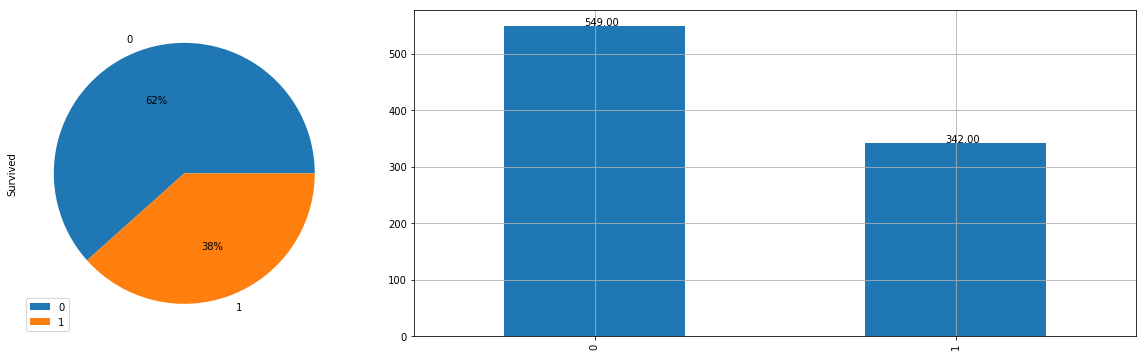

In [10]:
fig = plt.figure(figsize=(20, 6))

ax1 = plt.subplot2grid((1, 3), (0, 0))
data['Survived'].value_counts().plot.pie(legend=True, autopct='%1.0f%%', ax=ax1)

ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
data['Survived'].value_counts().plot.bar()
ax2.grid()
x_offset = -0.03
y_offset = 0.05
for p in ax2.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

**Continuous with Categorical**

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


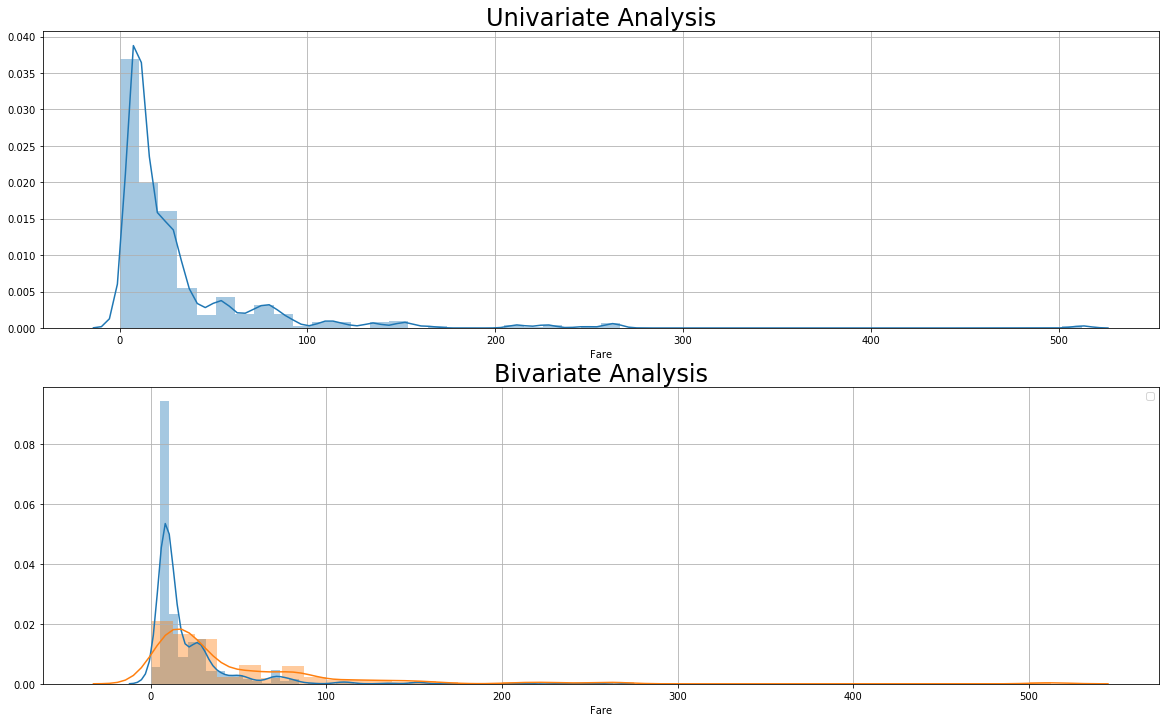

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(20,12))
sns.distplot(data['Fare'], ax=ax[0])
ax[0].grid()
ax[0].set_title('Univariate Analysis', fontsize=24)

for i in range(2):
    sns.distplot(data[data['Survived'] == i]['Fare'], ax=ax[1])
ax[1].set_title('Bivariate Analysis', fontsize=24)
ax[1].grid()
ax[1].legend()

**Continuous with Continuous**

Text(0.5, 1.0, 'Bivariate Analysis')

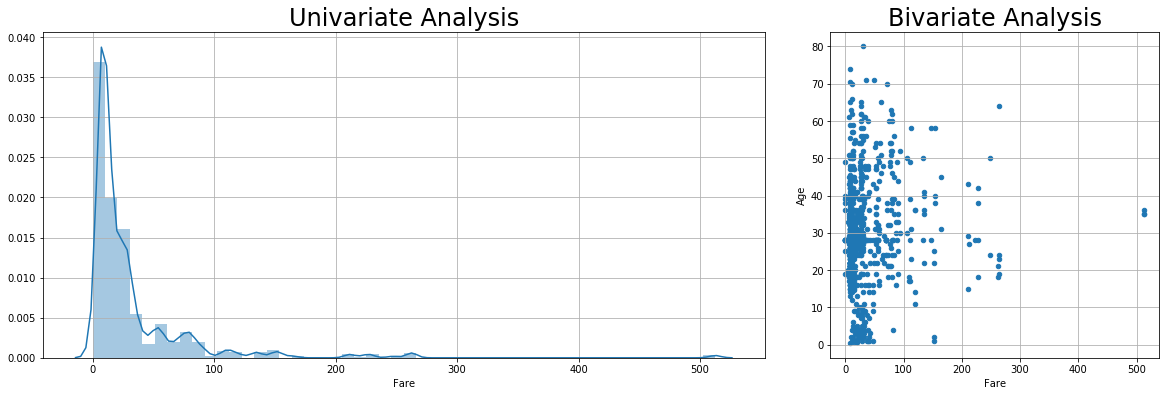

In [12]:
fig = plt.figure(figsize=(20, 6))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.distplot(data['Fare'], ax=ax1)
ax1.grid()
ax1.set_title('Univariate Analysis', fontsize=24)

ax2 = plt.subplot2grid((1, 3), (0, 2))
data[['Fare', 'Age']].plot.scatter(x='Fare', y='Age', ax=ax2, grid=True)
ax2.set_title('Bivariate Analysis', fontsize=24)

**Categorical with Categorical**

Text(0.5, 1.0, 'Bivariate Analysis')

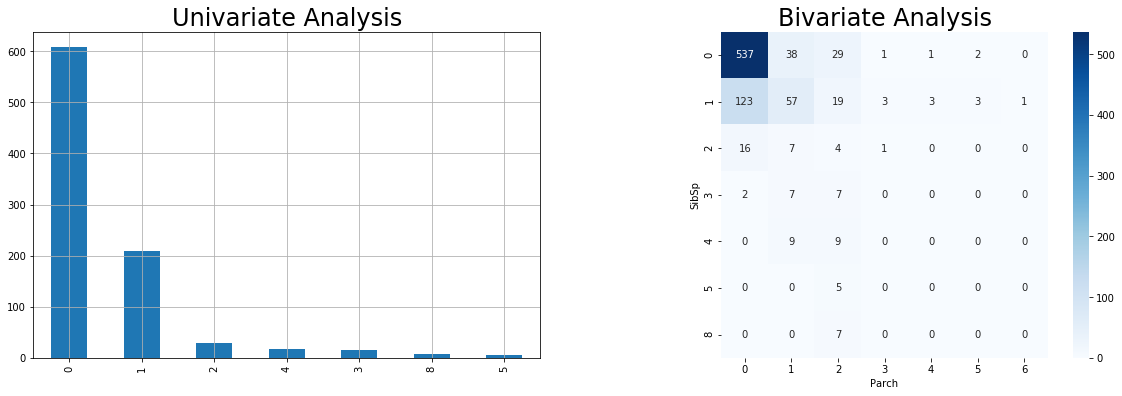

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

data['SibSp'].value_counts().plot.bar(ax=ax[0], grid=True)
ax[0].set_title('Univariate Analysis', fontsize=24)

sns.heatmap(pd.crosstab(data['SibSp'], data['Parch']), ax=ax[1], annot=True, cmap='Blues', square=True, fmt='d')
ax[1].set_title('Bivariate Analysis', fontsize=24)

**Text Data**

In [14]:
from wordcloud import WordCloud

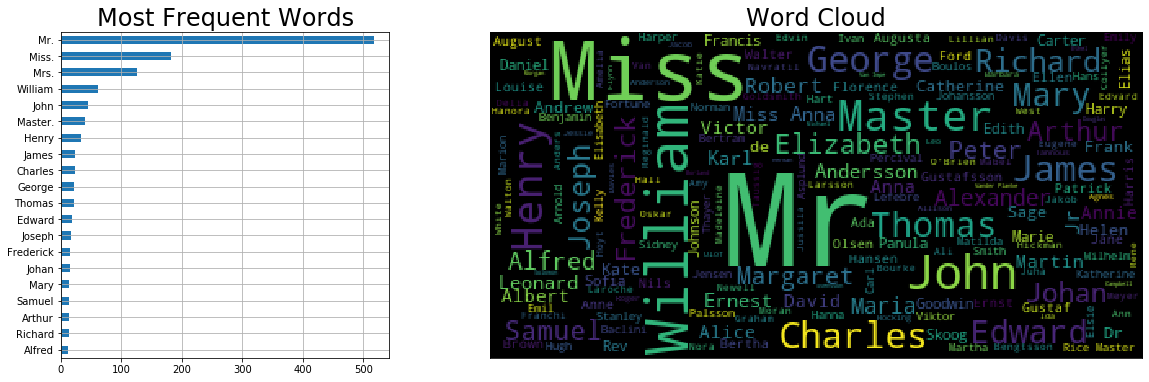

In [15]:
fig = plt.figure(figsize=(20, 6))

ax1 = plt.subplot2grid((1, 3), (0, 0))
pd.Series(' '.join(data['Name']).split()).value_counts().head(20)[::-1].plot.barh(ax=ax1, grid=True)
ax1.set_title('Most Frequent Words', fontsize=24)

ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
wordcloud = WordCloud().generate(' '.join((data['Name'].values)))
ax2.imshow(wordcloud)
ax2.set_title('Word Cloud', fontsize=24)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

**Correlation**

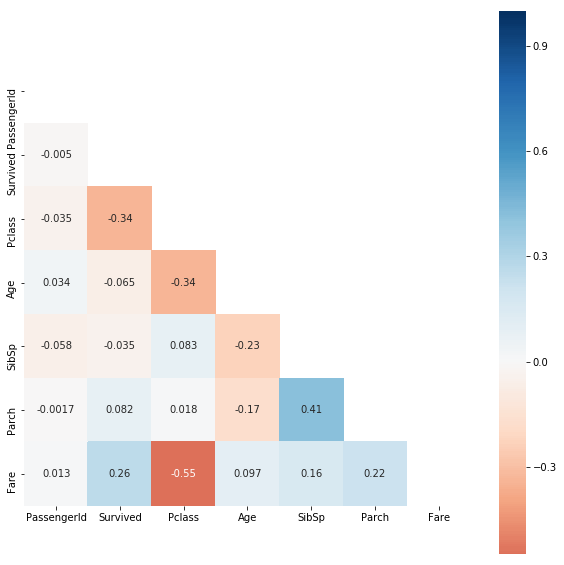

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True

sns.heatmap(data.corr(), mask=mask, cmap="RdBu", ax=ax, annot=True, square=True, center=0)

# Machine Learning

In [17]:
from sklearn.metrics import log_loss, hamming_loss, roc_auc_score, hinge_loss
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import normalize

In [18]:
feats = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

In [19]:
def train_classifier(model, feats, target, feat_names=None, labels=None, interpret=None, loss_func=log_loss, k=11, **kwargs):
    model_performance = {
        'loss': [],
        'score': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1 score': []
    }
    
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=101)
    kf = KFold(n_splits=k, shuffle=True, random_state=101)

    for train_indices, test_indices in tqdm(skf.split(feats, target)):
        X_train = feats[train_indices]
        y_train = target[train_indices]

        X_test = feats[test_indices]
        y_test = target[test_indices]

        model.fit(X_train, y_train)
        y_pred_ = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        model_performance['loss'].append(loss_func(y_test, y_pred_))
        model_performance['accuracy'].append(accuracy_score(y_test, y_pred))
        model_performance['score'].append(roc_auc_score(y_test, y_pred_[:, 1].reshape((-1,))))
        model_performance['precision'].append(precision_score(y_test, y_pred))
        model_performance['recall'].append(recall_score(y_test, y_pred))
        model_performance['f1 score'].append(f1_score(y_test, y_pred))


    fig = plt.figure(figsize=(20, 6))

    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    
    if 'plot_loss' in kwargs.keys() and kwargs['plot_loss'] == True:
        ax1.plot(model_performance['loss'], label='loss per iteration')
        ax1.plot(np.ones(k)*np.mean(model_performance['loss']), '--', label='mean loss')

    ax1.plot(model_performance['accuracy'], label='accuracy per iteration')
    ax1.plot(np.ones(k)*np.mean(model_performance['accuracy']), '--', label='mean accuracy')

    if 'plot_roc_auc' in kwargs.keys() and kwargs['plot_roc_auc'] == True:
        ax1.plot(model_performance['score'], label='score per iteration')
        ax1.plot(np.ones(k)*np.mean(model_performance['score']), '--', label='mean score')
    
    if 'plot_precision' in kwargs.keys() and kwargs['plot_precision'] == True:
        ax1.plot(model_performance['precision'], label='precision per iteration')
        ax1.plot(np.ones(k)*np.mean(model_performance['precision']), '--', label='mean precision')    

    if 'plot_recall' in kwargs.keys() and kwargs['plot_recall'] == True:
        ax1.plot(model_performance['recall'], label='recall per iteration')
        ax1.plot(np.ones(k)*np.mean(model_performance['recall']), '--', label='mean recall')    

    if 'plot_f1' in kwargs.keys() and kwargs['plot_f1'] == True:
        ax1.plot(model_performance['f1 score'], label='f1 score per iteration')
        ax1.plot(np.ones(k)*np.mean(model_performance['f1 score']), '--', label='mean f1 score')    

    ax1.grid()
    ax1.legend()
    ax1.set_xlabel('fold')
    ax1.set_ylabel('value')
    ax1.set_title('Model Performance')

    ax2 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    cm = normalize(confusion_matrix(y_test, y_pred), axis=1, norm='l1') * 100
    sns.heatmap(cm, annot=True, square=True, ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')    
    if labels is not None:
        ax2.set_xticklabels(labels, rotation = 45)
        ax2.set_yticklabels(labels, rotation = 45)
    
    
    if interpret is not None:
        if feat_names is None:
            assert "Provide feat_names"
        fig, ax = plt.subplots(figsize=(20, 6))
        if interpret == 'linear':
            ax.bar(x=feat_names+['intercept'], height=np.append(model.coef_[0], model.intercept_[0]))
            ax.grid()
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
            ax.set_title('Model Coefficients')
        if interpret == 'tree':
            ax.bar(x=feat_names, height=model.feature_importances_)
            ax.grid()
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
            ax.set_title('Model Coefficients')            
    
    return model_performance, cm, model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

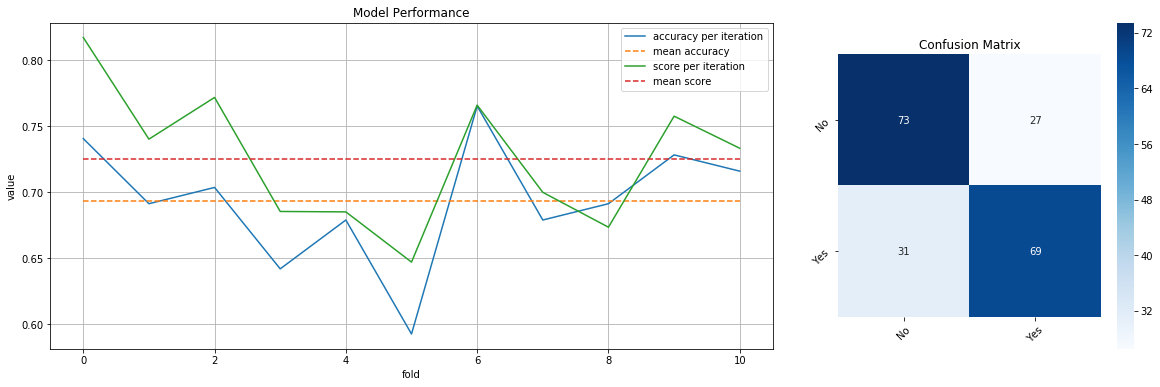

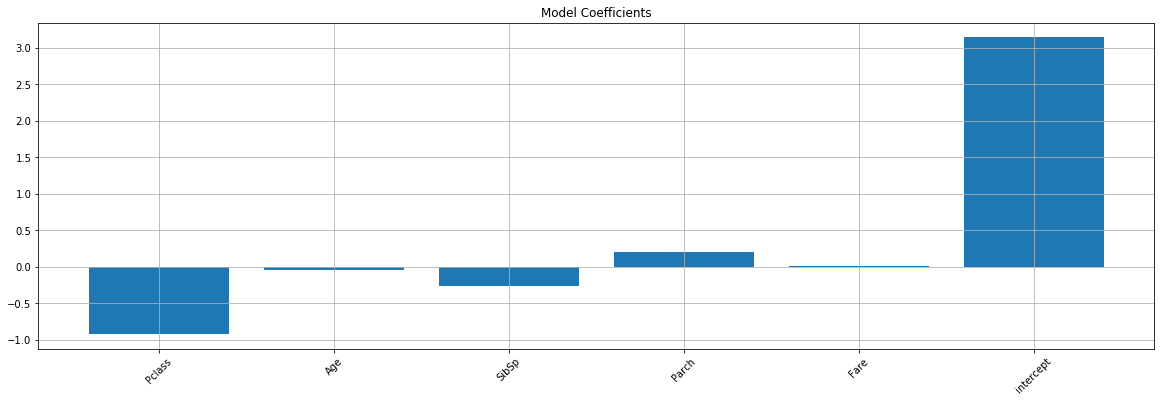

In [21]:
performance, cm, model = train_classifier(LogisticRegression(class_weight='balanced'), 
                                     data[feats].values, data[target].values, 
                                     plot_roc_auc=True, interpret='linear', feat_names=feats, labels=['No', 'Yes'])

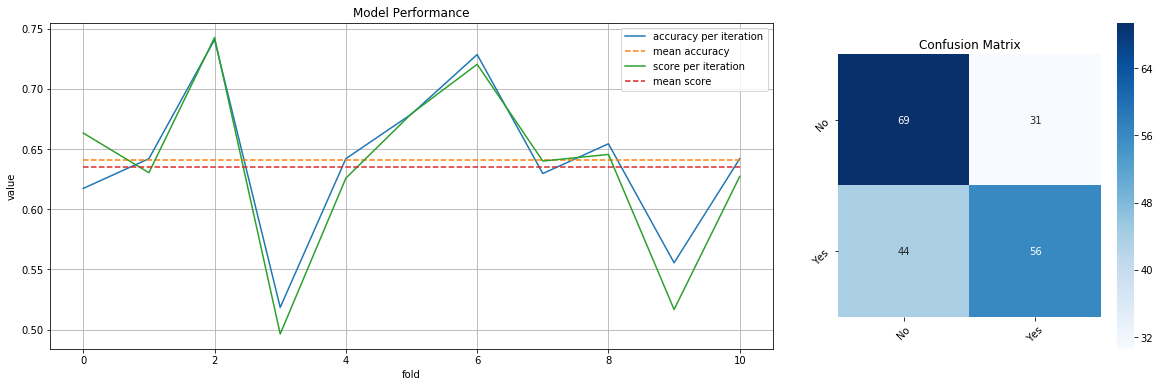

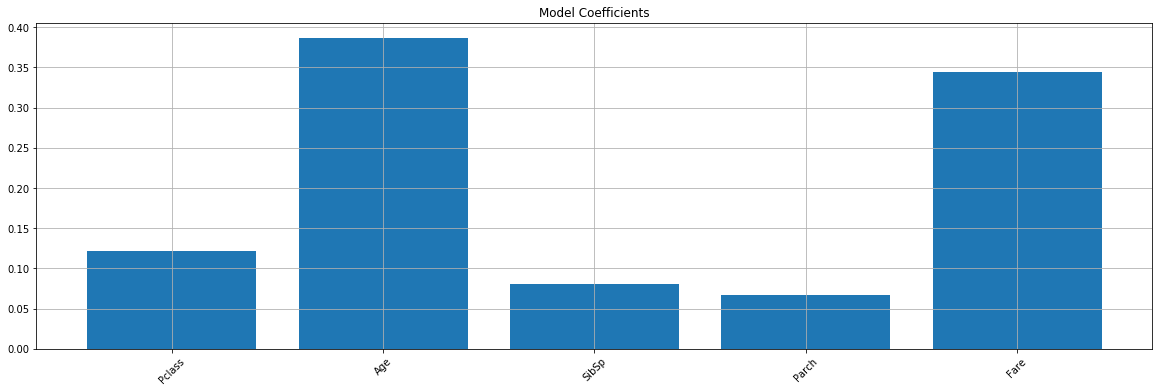

In [22]:
performance, cm, model = train_classifier(DecisionTreeClassifier(class_weight='balanced'), 
                                     data[feats].values, data[target].values, 
                                     plot_roc_auc=True, interpret='tree', feat_names=feats, labels=['No', 'Yes'])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
def train_regressor(model, feats, target, feat_names=None, interpret=None, loss_func=mean_squared_error, k=11, **kwargs):
    model_performance = {
        'loss': [],
        'score': [],
    }
    
    kf = KFold(n_splits=k, shuffle=True, random_state=101)

    for train_indices, test_indices in tqdm(kf.split(feats, target)):
        X_train = feats[train_indices]
        y_train = target[train_indices]

        X_test = feats[test_indices]
        y_test = target[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_performance['loss'].append(loss_func(y_test, y_pred))
        model_performance['score'].append(r2_score(y_test, y_pred))

    fig = plt.figure(figsize=(20, 6))

    ax1 = plt.subplot2grid((1, 3), (0, 0))
    ax2 = plt.subplot2grid((1, 3), (0, 1))
    
    ax1.plot(model_performance['loss'], label='loss per iteration')
    ax1.plot(np.ones(k)*np.mean(model_performance['loss']), '--', label='mean loss')

    ax2.plot(model_performance['score'], label='score per iteration')
    ax2.plot(np.ones(k)*np.mean(model_performance['score']), '--', label='mean score')
    
    ax1.grid()
    ax1.legend()
    ax1.set_xlabel('fold')
    ax1.set_ylabel('value')
    ax1.set_title('Model Loss')

    ax2.grid()
    ax2.legend()
    ax2.set_xlabel('fold')
    ax2.set_ylabel('value')
    ax2.set_title('Model Score')
    
    ax3 = plt.subplot2grid((1, 3), (0, 2))
    sns.distplot(y_test-y_pred, ax=ax3)
    ax3.set_title('Actual-Predicted')
    ax3.grid()
    
    if interpret is not None:
        if feat_names is None:
            assert "Provide feat_names"
        fig, ax = plt.subplots(figsize=(20, 6))
        if interpret == 'linear':
            ax.bar(x=feat_names+['intercept'], 
                   height=np.append(model.coef_, model.intercept_))
            ax.grid()
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
            ax.set_title('Model Coefficients')
        if interpret == 'tree':
            ax.bar(x=feat_names, height=model.feature_importances_)
            ax.grid()
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
            ax.set_title('Model Coefficients')            
    
    return model_performance, model

In [25]:
feats = ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']
target = 'Fare'

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


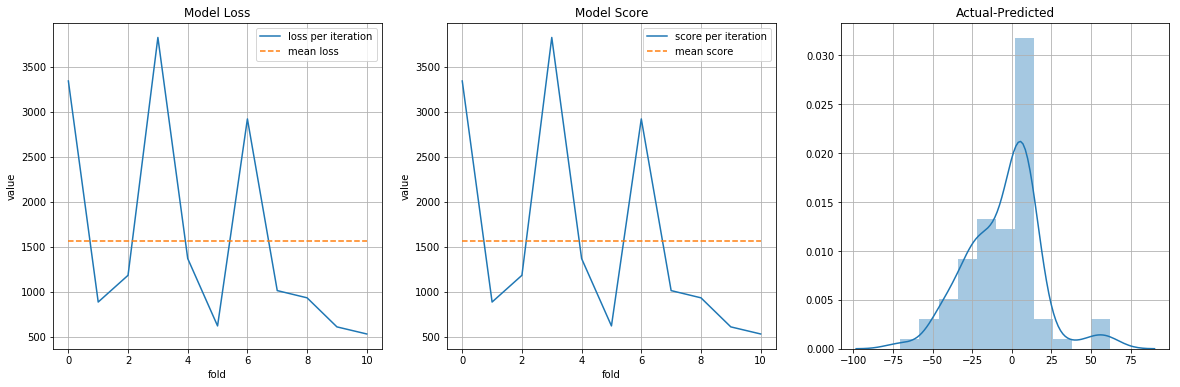

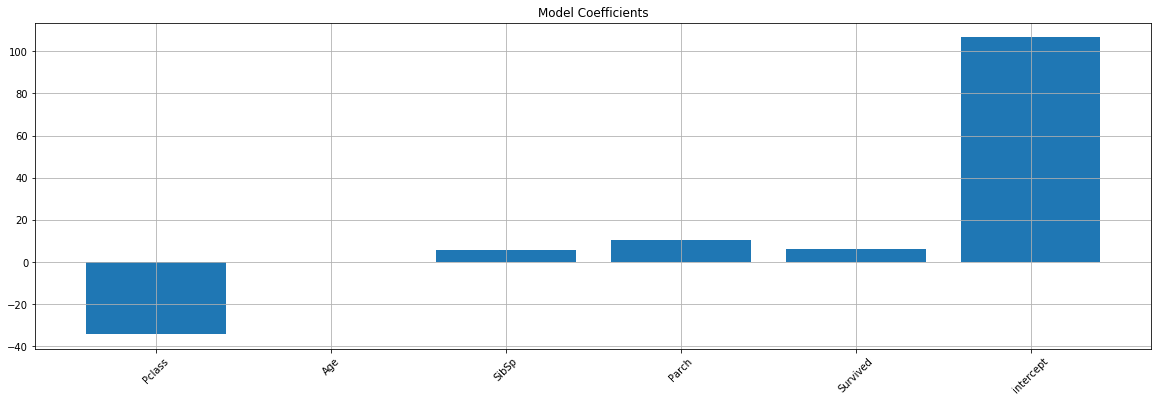

In [27]:
performance, model = train_regressor(LinearRegression(), 
                                     data[feats].values, data[target].values, 
                                      interpret='linear', feat_names=feats)

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


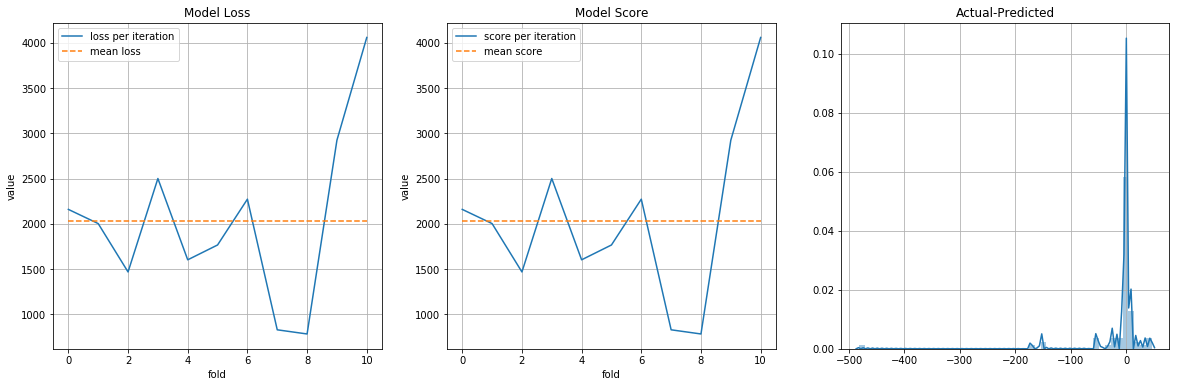

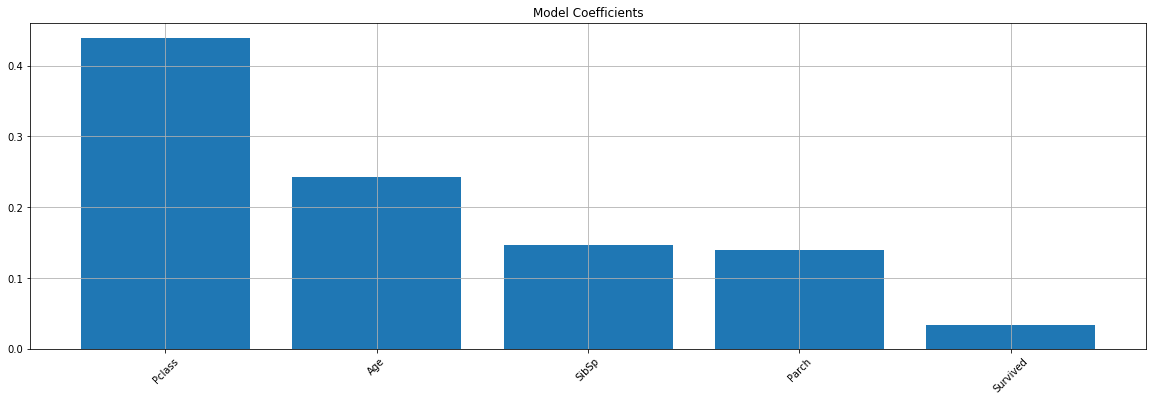

In [28]:
performance, model = train_regressor(DecisionTreeRegressor(), 
                                     data[feats].values, data[target].values, 
                                      interpret='tree', feat_names=feats)